In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
!kaggle datasets download -d akshaydattatraykhare/nsetataglobal

Dataset URL: https://www.kaggle.com/datasets/akshaydattatraykhare/nsetataglobal
License(s): CC0-1.0



C:\Users\ASUS\anaconda3\envs\nlp_env\lib\site-packages\requests\__init__.py:86: RequestsDependencyWarning: Unable to find acceptable character detection dependency (chardet or charset_normalizer).
  warnings.warn(

  0%|          | 0.00/26.9k [00:00<?, ?B/s]
100%|##########| 26.9k/26.9k [00:00<?, ?B/s]


In [6]:
# extracting the zip dataset

from zipfile import ZipFile
dataset = 'nsetataglobal.zip'

with ZipFile(dataset, 'r') as zip:
    zip.extractall()
    print('The dataset is extracted')

The dataset is extracted


In [8]:
df = pd.read_csv(r'NSE-TATAGLOBAL11.csv')
df.head(10)

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-10-08,208.00,222.25,206.85,216.00,215.15,4642146.0,10062.83
1,2018-10-05,217.00,218.60,205.90,210.25,209.20,3519515.0,7407.06
2,2018-10-04,223.50,227.80,216.15,217.25,218.20,1728786.0,3815.79
3,2018-10-03,230.00,237.50,225.75,226.45,227.60,1708590.0,3960.27
4,2018-10-01,234.55,234.60,221.05,230.30,230.90,1534749.0,3486.05
5,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914.0,7162.35
6,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859.0,11859.95
7,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909.0,5248.60
8,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368.0,5503.90
9,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509.0,7999.55


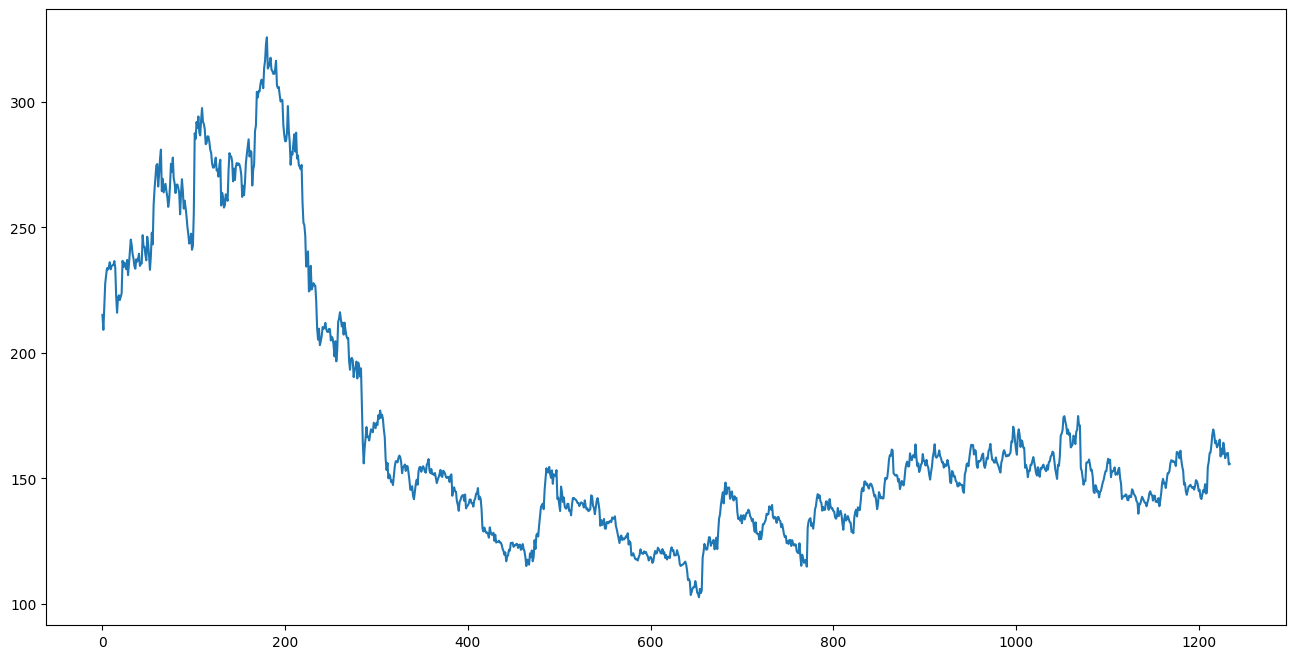

In [10]:
plt.figure(figsize=(16,8))
plt.plot(df['Close'], label='Closing price')

In [15]:
### Classsification problem: buy(+1) or sell(-1) stock

In [12]:
df['Open - Close'] = df['Open'] - df['Close']
df['High - Low']   = df['High'] - df['Low']
df = df.dropna()

### Input features to predict whether customer should buy or sell the stock

In [14]:
X = df[['Open - Close', 'High - Low']]
X.head()

,Open - Close,High - Low
0,-7.15,15.40
1,7.80,12.70
2,5.30,11.65
3,2.40,11.75
4,3.65,13.55


### Intention is to store +1 for the buy signal and -1 for the sell signal. The target variable is 'Y' for classification task.

In [17]:
Y = np.where(df['Close'].shift(-1)>df['Close'],1,-1)

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=44)

### Implementation of KNN Classifier

In [24]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import neighbors
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# using gridsearch to find the best parameter
params = {'n_neighbors':[2,3,4,5,6,7,8,9,10,11,12,13,14,15]}
knn    = neighbors.KNeighborsClassifier()
model  = GridSearchCV(knn, params, cv=5)

# fit the model
model.fit(X_train, Y_train)

# Accuracy Score
accuracy_train = accuracy_score(Y_train, model.predict(X_train))
accuracy_test  = accuracy_score(Y_test, model.predict(X_test))

print('Train data accuracy:- %.2f' %accuracy_train)
print('Test data accuracy:- %.2f' %accuracy_test)

Train data accuracy:- 0.88
Test data accuracy:- 0.86


In [18]:
Y

array([-1,  1,  1, ..., -1,  1, -1])

In [26]:
predictions_classification = model.predict(X_test)

In [27]:
actual_predicted_data = pd.DataFrame({'Actual Class':Y_test, 'Predicted Class':predictions_classification})

In [28]:
actual_predicted_data.head(10)

,Actual Class,Predicted Class
0,-1,-1
1,-1,-1
2,-1,-1
3,1,1
4,1,1
5,-1,-1
6,1,1
7,-1,-1
8,1,1
9,-1,1


###  Implementation of KNN Regression 

In [25]:
y = df['Close']

In [29]:
y

0       215.15
1       209.20
2       218.20
3       227.60
4       230.90
         ...  
1230    159.45
1231    160.05
1232    160.15
1233    155.55
1234    155.80
Name: Close, Length: 1235, dtype: float64

In [30]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn import neighbors

X_train_reg, X_test_reg, Y_train_reg, Y_test_reg = train_test_split(X, y, test_size=0.25, random_state= 44)

# using gridsearch to find the best parameter
params    = {'n_neighbors':[2,3,4,5,6,7,8,9,10,11,12,13,14,15]}
knn_reg   = neighbors.KNeighborsRegressor()
model_reg = GridSearchCV(knn_reg, params, cv=5)

# fit the model and make predictions
model_reg.fit(X_train_reg, Y_train_reg)
predictions = model_reg.predict(X_test_reg)

In [31]:
print(predictions)

[194.13333333 195.22666667 241.17333333 160.50333333 132.12666667
 225.41333333 198.15333333 174.71333333 130.63       137.87333333
 190.37333333 136.34666667 153.69       137.92333333 238.05666667
 149.19333333 168.46333333 143.99333333 180.39       142.59333333
 169.21666667 167.02333333 184.94666667 149.61666667 150.27
 138.69       157.04       141.01666667 212.63666667 240.75
 139.23       151.44       155.12       155.51333333 142.98333333
 245.51333333 171.78       143.48666667 133.82333333 143.84
 146.15333333 138.24333333 148.75666667 189.26666667 141.07666667
 152.07666667 140.00333333 131.75       176.82666667 226.25666667
 153.87666667 214.65       136.79333333 187.22       141.21666667
 142.47       133.54333333 141.02333333 163.46666667 223.89
 156.58       144.06333333 139.39       140.21333333 185.09666667
 207.2        153.53666667 194.35       137.12333333 147.11
 168.96666667 142.79666667 171.51666667 155.54333333 153.09
 152.66       192.56333333 190.78666667 170.45

In [32]:
# RMSE ---- Root Mean Square Error

rmse = np.sqrt(np.mean(np.power((np.array(Y_test)-np.array(predictions)),2)))
rmse

169.4572072961273

In [34]:
valid = pd.DataFrame({'Actual Close':Y_test_reg, 'Predicted class': predictions})

In [35]:
valid.head(10)

,Actual Close,Predicted class
1000,161.60,194.133333
715,132.50,195.226667
283,193.85,241.173333
410,143.90,160.503333
1188,145.15,132.126667
141,278.20,225.413333
230,226.35,198.153333
794,139.50,174.713333
481,139.40,130.630000
707,137.55,137.873333
